In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('./iris.data')

## Data Analysis

In [9]:
data.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [11]:
data.describe()      ####需要问是否花瓣长度和宽度需要满足25%/1.5

,5.1,3.5,1.4,0.2
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
5.1            149 non-null float64
3.5            149 non-null float64
1.4            149 non-null float64
0.2            149 non-null float64
Iris-setosa    149 non-null object
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


In [14]:
data['Iris-setosa'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        49
Name: Iris-setosa, dtype: int64

In [ ]:
# df['class'].replace(["Iris-setossa","versicolor"], ["Iris-setosa","Iris-versicolor"], inplace=True)  #this is extra data

In [ ]:
# al_df = df[df['class'] != 'Iris-virginica']                #this is extra data

In [16]:
%matplotlib inline

In [ ]:
# final_df.hist(column = 'sepal_length_cm',bins=20, figsize=(10,5))    #this is extra data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0BAF49D0>,
      dtype=object)

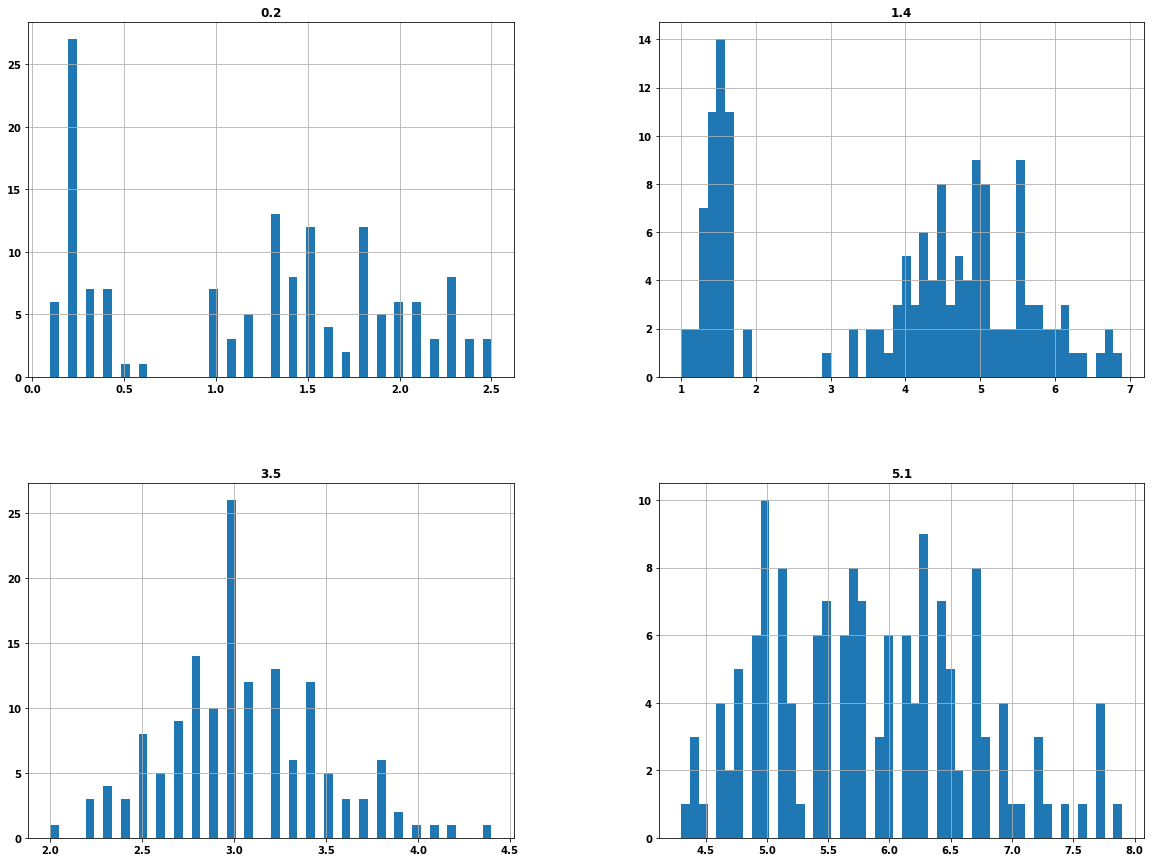

In [17]:
data.hist(bins=50, figsize=(20,15))

C:\Users\WDMWDL\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


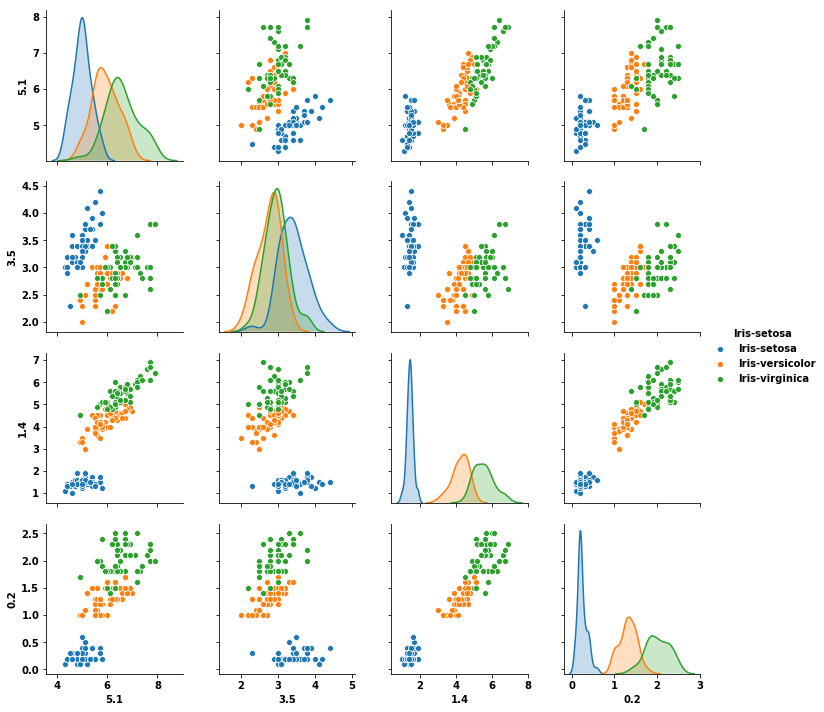

In [19]:
sns.pairplot(data, hue='Iris-setosa', size=2.5)

In [29]:
corr_matrix = data.corr()                              ## This is wrong

In [30]:
corr_matrix['Iris-setosa'].sort_values(ascending=False)

Iris-setosa    1.000000
3.5            0.414532
5.1           -0.781219
1.4           -0.948519
0.2           -0.956014
Name: Iris-setosa, dtype: float64

## Lable Encoding

In [3]:
data['Iris-setosa'].replace(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa'], [0,1,2], inplace = True)

In [27]:
encoder = LabelBinarizer(sparse_output = True)

In [28]:
data_1hot = encoder.fit_transform(data['Iris-setosa'])

In [30]:
# data_1hot.toarray()

In [4]:
output = data.drop(data.columns[[0,1,2,3]], axis = 1)
inp = data.drop(data.columns[[4]], axis = 1)

In [5]:
scalerEncoder = StandardScaler()
inp = scalerEncoder.fit_transform(inp)
X_train, X_test, y_train, y_test = train_test_split(inp, output, test_size=0.2, random_state=42)

## Model Construction

In [7]:
X_tr_arr = X_train
X_ts_arr = X_test
y_tr_arr = y_train.as_matrix()
y_ts_arr = y_test.as_matrix()

C:\Users\WDMWDL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\WDMWDL\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [13]:
print('Input Shape', (X_tr_arr.shape))
print('Output Shape', X_test.shape)

Input Shape (119, 4)
Output Shape (30, 4)


In [15]:
def weightInitialization(features):
    w = np.zeros((1, features))
    b = 0
    return w, b

In [16]:
def sigmond_activation(result):
    final_result = 1 / (1 + np.exp(-result))
    return final_result

In [ ]:
def model_optimize(w, b, X, Y):
    m = X.shape[0]
    
    # prediction
    final_result = sigmoid_activation(np.dot(w, X.T) + b)
    Y_T = Y.T
    cost = (-1/m)*(np.sum((Y_T*np.log(final_result)) + ((1-Y_T)*(np.log(1-final_result)))))
    # gradient calculation
    dw = (1/m)*(np.dot(X.T, (final_result - Y.T).T))
    db = (1/m)*(np.sum(final_result - Y.T))
    grads = {"dw":dw, "db":db}
    return grads, cost

In [ ]:
def model_predict(w, b, X, Y, learning rate, num_iterations):
    costs = []
    for i in range(num_iterations):
        grads, cost = model_optimize(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]
        # weight update
        w = w - (learning_rate * dw.T)
        b = b - (learning_rate * db)
        if i % 100 == 0:
            costs.append(cost)
    #final parameters
    coeff = {"w": w, "b": b}
    gradient = {"dw": dw, "db": db}
    return coeff, gradient, costs

In [ ]:
def predict(final_pred, m):
    y_pred = np.zeros((1,m))
    for i in range(final_pred.shape[1]):
        if final_pred[0][i] > 0.5:
            y_pred[0][i] = 1
    return y_pred

In [17]:
# Get Number of features
n_fetures = X_tr_arr.shape[1]
print("Number of features is {}".format(n_features))
w, b = weightInitialization(n_features)
#Gradient Descent
coeff, gradient, costs = model_predict(w, b, X_tr_arr, y_tr_arr, learning_rate=0.0001,no_iterations=4500)
#Final prediction
w = coeff["w"]
b = coeff["b"]
print('Optimized weights', w)
print('Optimized intercept',b)
#
final_train_pred = sigmoid_activation(np.dot(w,X_tr_arr.T)+b)
final_test_pred = sigmoid_activation(np.dot(w,X_ts_arr.T)+b)
#
m_tr =  X_tr_arr.shape[0]
m_ts =  X_ts_arr.shape[0]
#
y_tr_pred = predict(final_train_pred, m_tr)
print('Training Accuracy',accuracy_score(y_tr_pred.T, y_tr_arr))
#
y_ts_pred = predict(final_test_pred, m_ts)
print('Test Accuracy',accuracy_score(y_ts_pred.T, y_ts_arr))

4

In [23]:
arr = np.ones((1,4))
arr.shape

(1, 4)

In [ ]:
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title('Cost reduction over time')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression()
clf.fit(X_tr_arr, y_tr_arr)
print (clf.intercept_, clf.coef_)
pred = clf.predict(X_ts_arr)
print ('Accuracy from sk-learn: {0}'.format(clf.score(X_ts_arr, y_ts_arr)))

## How to implement a KNN Model

In [1]:
from scipy.spatial.distance import cosine

def model(X, y):
    return [(Xi, yi) for Xi, yi in zip(X, y)]

def distance(x1, x2):
    return cosine(x1, x2)

def predict(x, k = 5):
    return sorted(model(X, y), key=lambda xi: distance(xi[0], x))[:k]

# 已经获得了most-similar with k number
# 然后呢， Counter() => most_common, 然后就可以获得出现最多的这个y了